In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns

In [2]:
from stt.data import Olist
from stt.order import Order
from stt.seller import Seller
seller = Seller().get_training_data()
order = Order().get_training_data()
data = Olist().get_data()

In [3]:
order

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,order_delivered_customer_date,order_purchase_timestamp,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,2017-10-10 21:25:13,2017-10-02 10:56:33,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,2018-08-07 15:27:45,2018-07-24 20:41:37,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,2018-08-17 18:06:29,2018-08-08 08:38:49,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,2017-12-02 00:28:42,2017-11-18 19:28:06,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,2018-02-16 18:17:02,2018-02-13 21:18:39,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97010,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,2017-03-17 15:08:01,2017-03-09 09:54:05,1,0,5,1,1,72.00,13.08
97011,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,2018-02-28 17:37:56,2018-02-06 12:58:58,0,0,4,1,1,174.90,20.10
97012,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,2017-09-21 11:24:17,2017-08-27 14:46:43,1,0,5,1,1,205.99,65.02
97013,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18


In [4]:
def review_cost(d):
    if d == 1:
        return 100
    if d == 2:
        return 50
    if d == 3:
        return 40
    return 0

def price_cut(d):
    return d*0.1

In [5]:
order['review_cost'] = order['review_score'].apply(review_cost)
order['price_cut'] = order['price'].apply(price_cut)

In [6]:
order_hist = order[order['order_status']=='delivered']
order_count = order.groupby(order_hist['order_delivered_customer_date'].dt.strftime("%y/%m")).agg({'order_id':'nunique','review_cost':'sum','price_cut':'sum'})

In [7]:
order_count

,order_id,review_cost,price_cut
order_delivered_customer_date,,,
16/10,205,3390,3040.112
16/11,58,1690,983.768
16/12,4,200,75.886
17/01,283,3380,3381.592
17/02,1351,15300,20000.292
17/03,2382,30330,33760.200
17/04,1849,26910,26962.304
17/05,3751,53210,52276.938
17/06,3223,42380,43480.695


In [8]:
order_count['order_id'].sum()

96470

In [9]:
order_id_seller_id = data['order_items'][['order_id','seller_id']]
monthly_seller = order.merge(order_id_seller_id, on='order_id')

In [10]:
monthly_seller = monthly_seller.groupby(order_hist['order_delivered_customer_date'].dt.strftime("%y/%m")).agg({'seller_id':'nunique'})

In [11]:
monthly = order_count.merge(monthly_seller, on='order_delivered_customer_date')
monthly['seller_id'] = monthly['seller_id']*80

In [12]:
monthly['cum_orders'] = monthly['order_id'].cumsum()

In [17]:
c = 500000/np.sqrt(monthly['orders'].cumsum().sum())
monthly['it_cost'] = round(c * np.sqrt(monthly["orders"]),1)

In [14]:
monthly.rename(columns={'order_id': 'orders', 'seller_id': 'seller_rev', 'price_cut': 'order_rev'},inplace=True)

In [18]:
monthly = monthly[['orders','order_rev', 'seller_rev','review_cost', 'it_cost']]

In [23]:
monthly2['total_rev'] = round(monthly2['order_rev'] + monthly2['seller_rev'],0)
monthly2['total_cost'] = round(monthly2['review_cost'] + monthly2['it_cost'],0)
monthly2['result'] = round(monthly2['total_rev'] - monthly2['total_cost'],0)

In [24]:
monthly2

,orders,order_rev,seller_rev,review_cost,it_cost,cum_orders,cum_rev,cum_it_cost,cum_review_cost,total_cost,profit,month,total_rev,result
order_delivered_customer_date,,,,,,,,,,,,,,
16/10,205,3040.112,12800,3390,23048.9,205,15840.112,23048.9,3390,26439.0,-10598.788,-10598.788,15840.0,-10599.0
16/11,58,983.768,4240,1690,12259.9,263,21063.880,26106.7,5080,13950.0,-10122.820,-8726.132,5224.0,-8726.0
16/12,4,75.886,320,200,3219.6,267,21459.766,26304.5,5280,3420.0,-10124.734,-3023.714,396.0,-3024.0
17/01,283,3381.592,16320,3380,27081.1,550,41161.358,37753.3,8660,30461.0,-5251.942,-10759.508,19702.0,-10759.0
17/02,1351,20000.292,48720,15300,59170.0,1901,109881.650,70188.3,23960,74470.0,15733.350,-5749.708,68720.0,-5750.0
17/03,2382,33760.200,66720,30330,78567.8,4283,210361.850,105353.2,54290,108898.0,50718.650,-8417.600,100480.0,-8418.0
17/04,1849,26962.304,58160,26910,69221.7,6132,295484.154,126059.3,81200,96132.0,88224.854,-11009.396,85122.0,-11010.0
17/05,3751,52276.938,84000,53210,98593.3,9883,431761.092,160036.2,134410,151803.0,137314.892,-15526.362,136277.0,-15526.0
17/06,3223,43480.695,81600,42380,91391.1,13106,556841.787,184293.0,176790,133771.0,195758.787,-8690.405,125081.0,-8690.0


<AxesSubplot:xlabel='order_delivered_customer_date', ylabel='orders'>

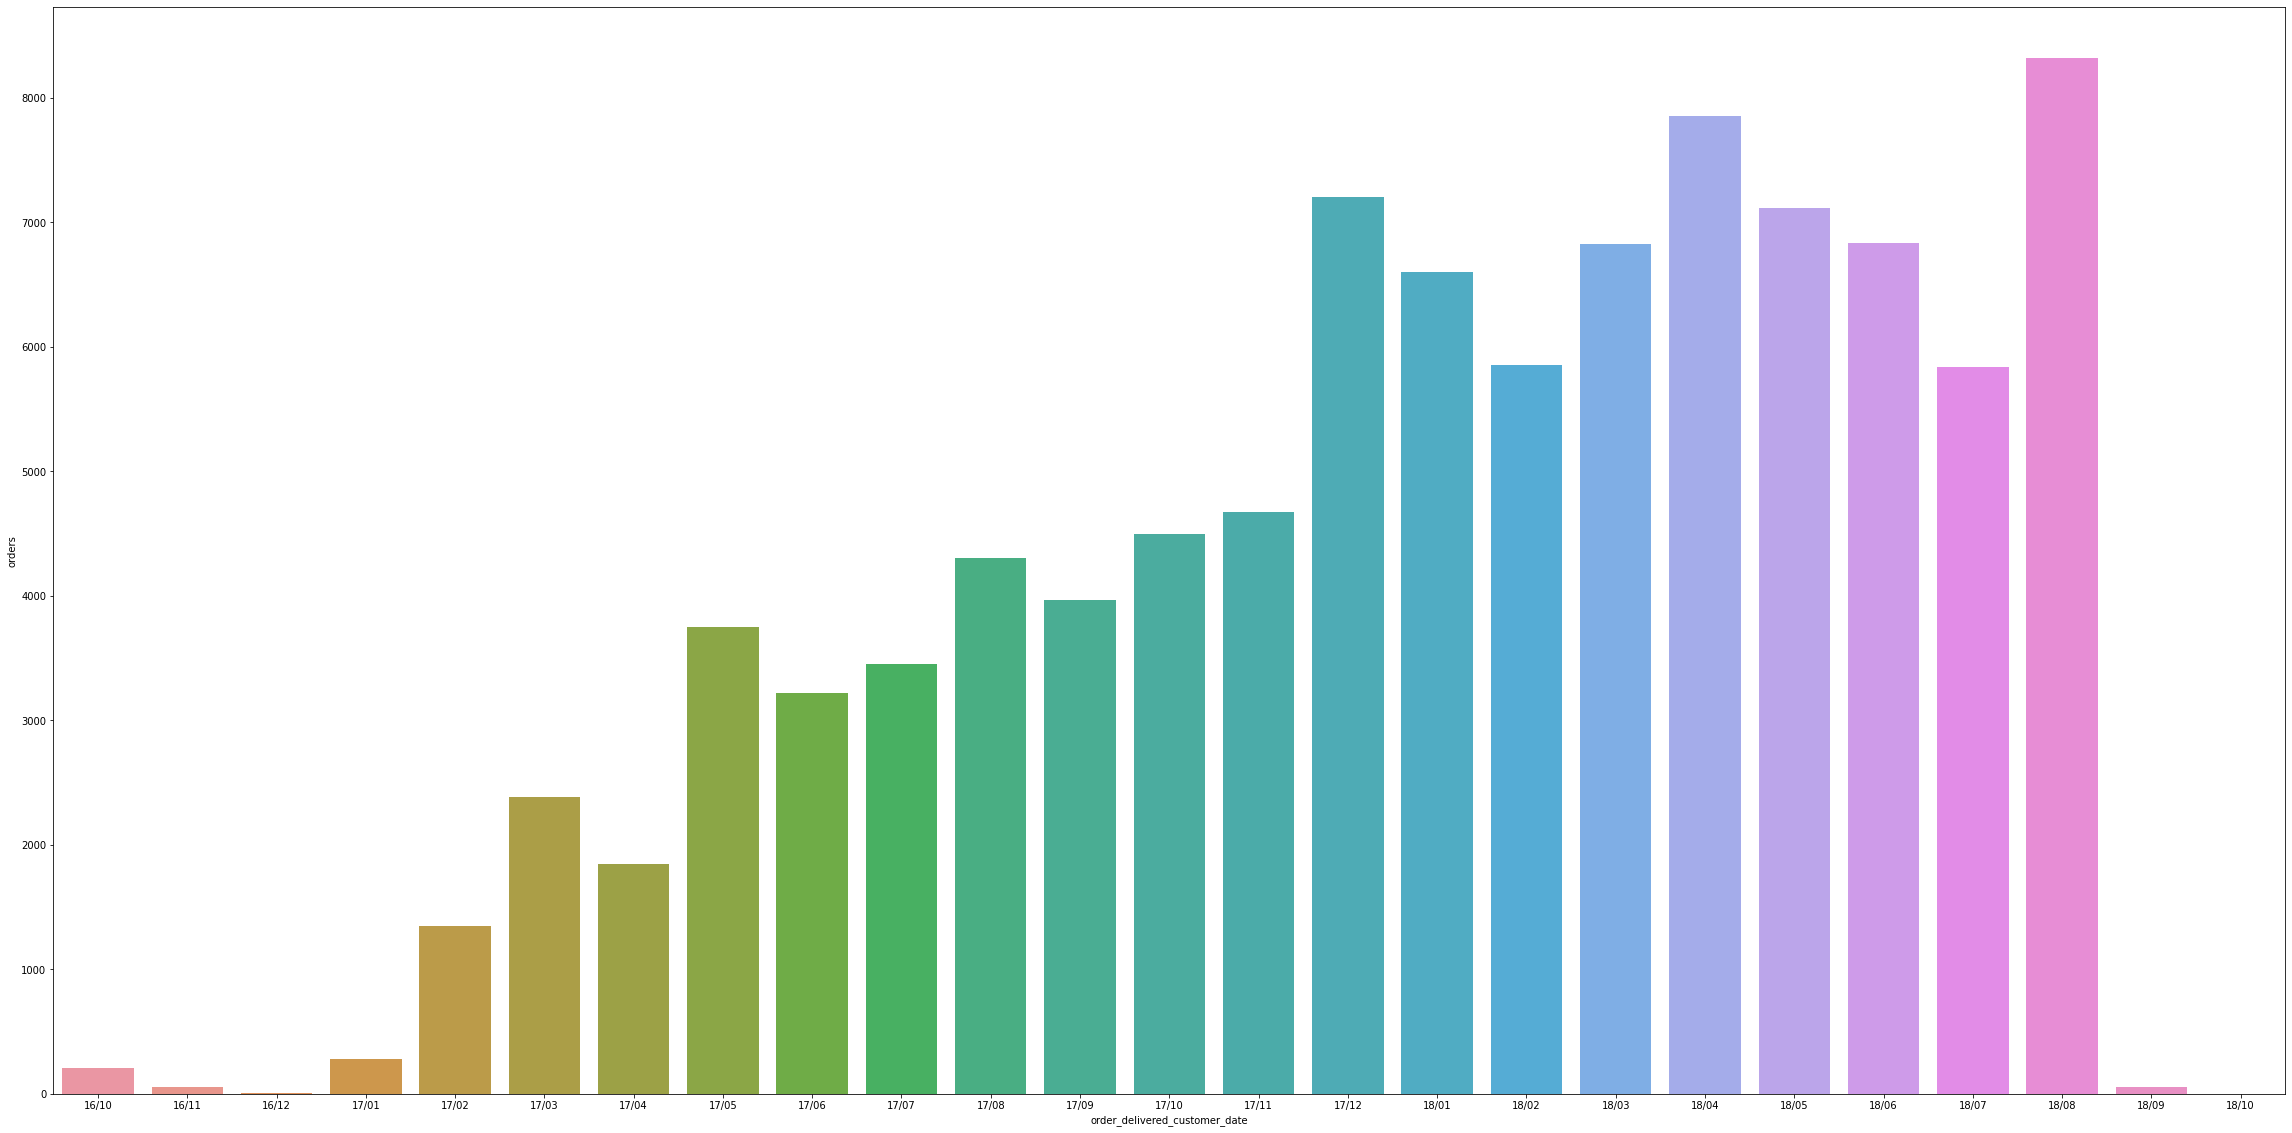

In [25]:
plt.figure(figsize=(40,20))
sns.barplot(y='orders', x = monthly2.index, data=monthly2)

<AxesSubplot:xlabel='order_delivered_customer_date', ylabel='Count'>

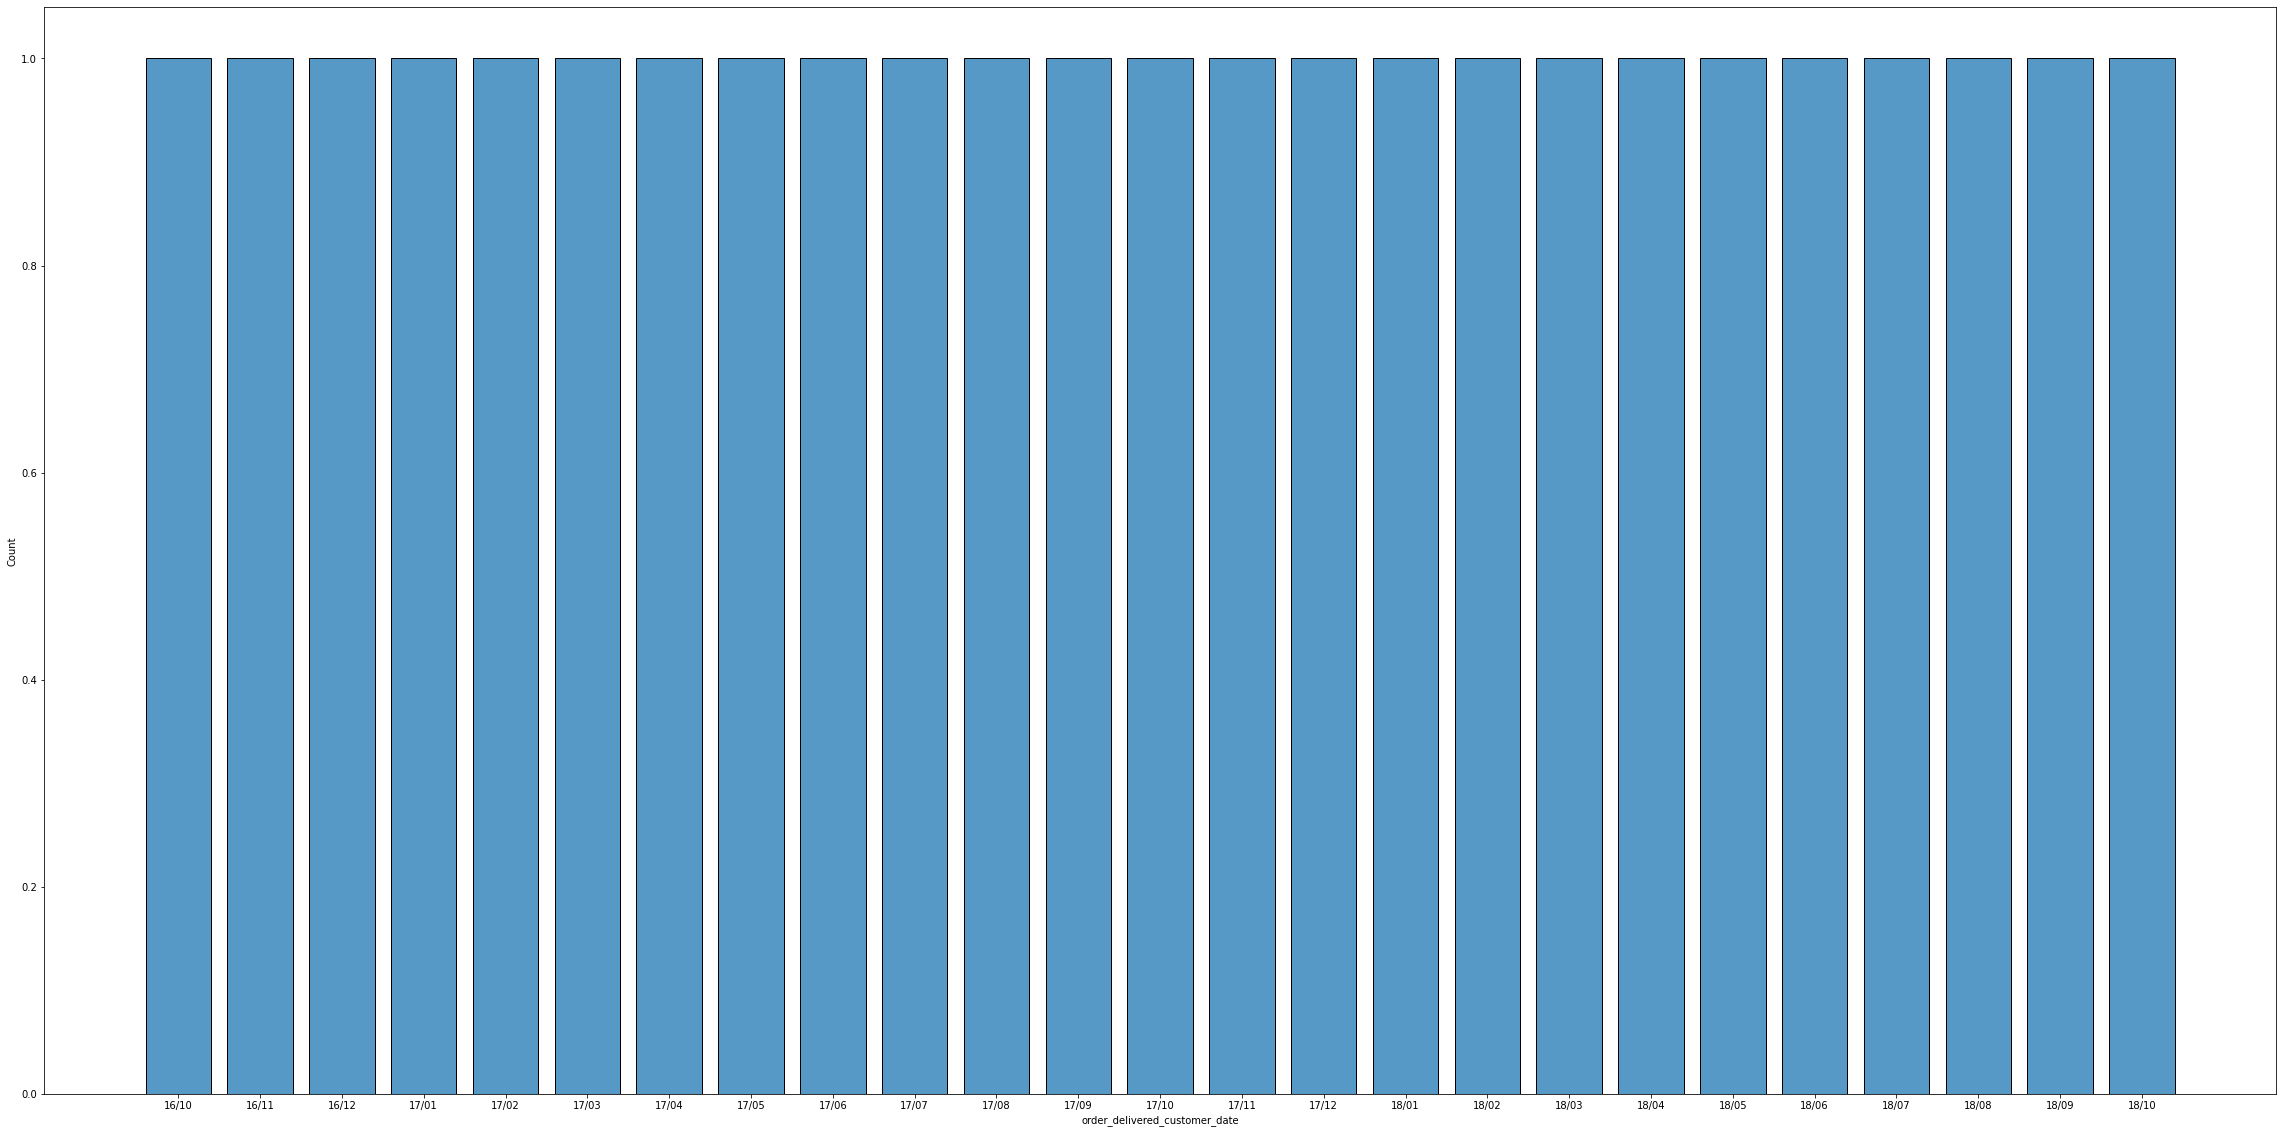

In [26]:
plt.figure(figsize=(40,20))
sns.histplot(monthly2[['order_rev','seller_rev']], x=monthly2.index,
             multiple='stack', palette='tab20c', shrink=0.8)

<BarContainer object of 25 artists>

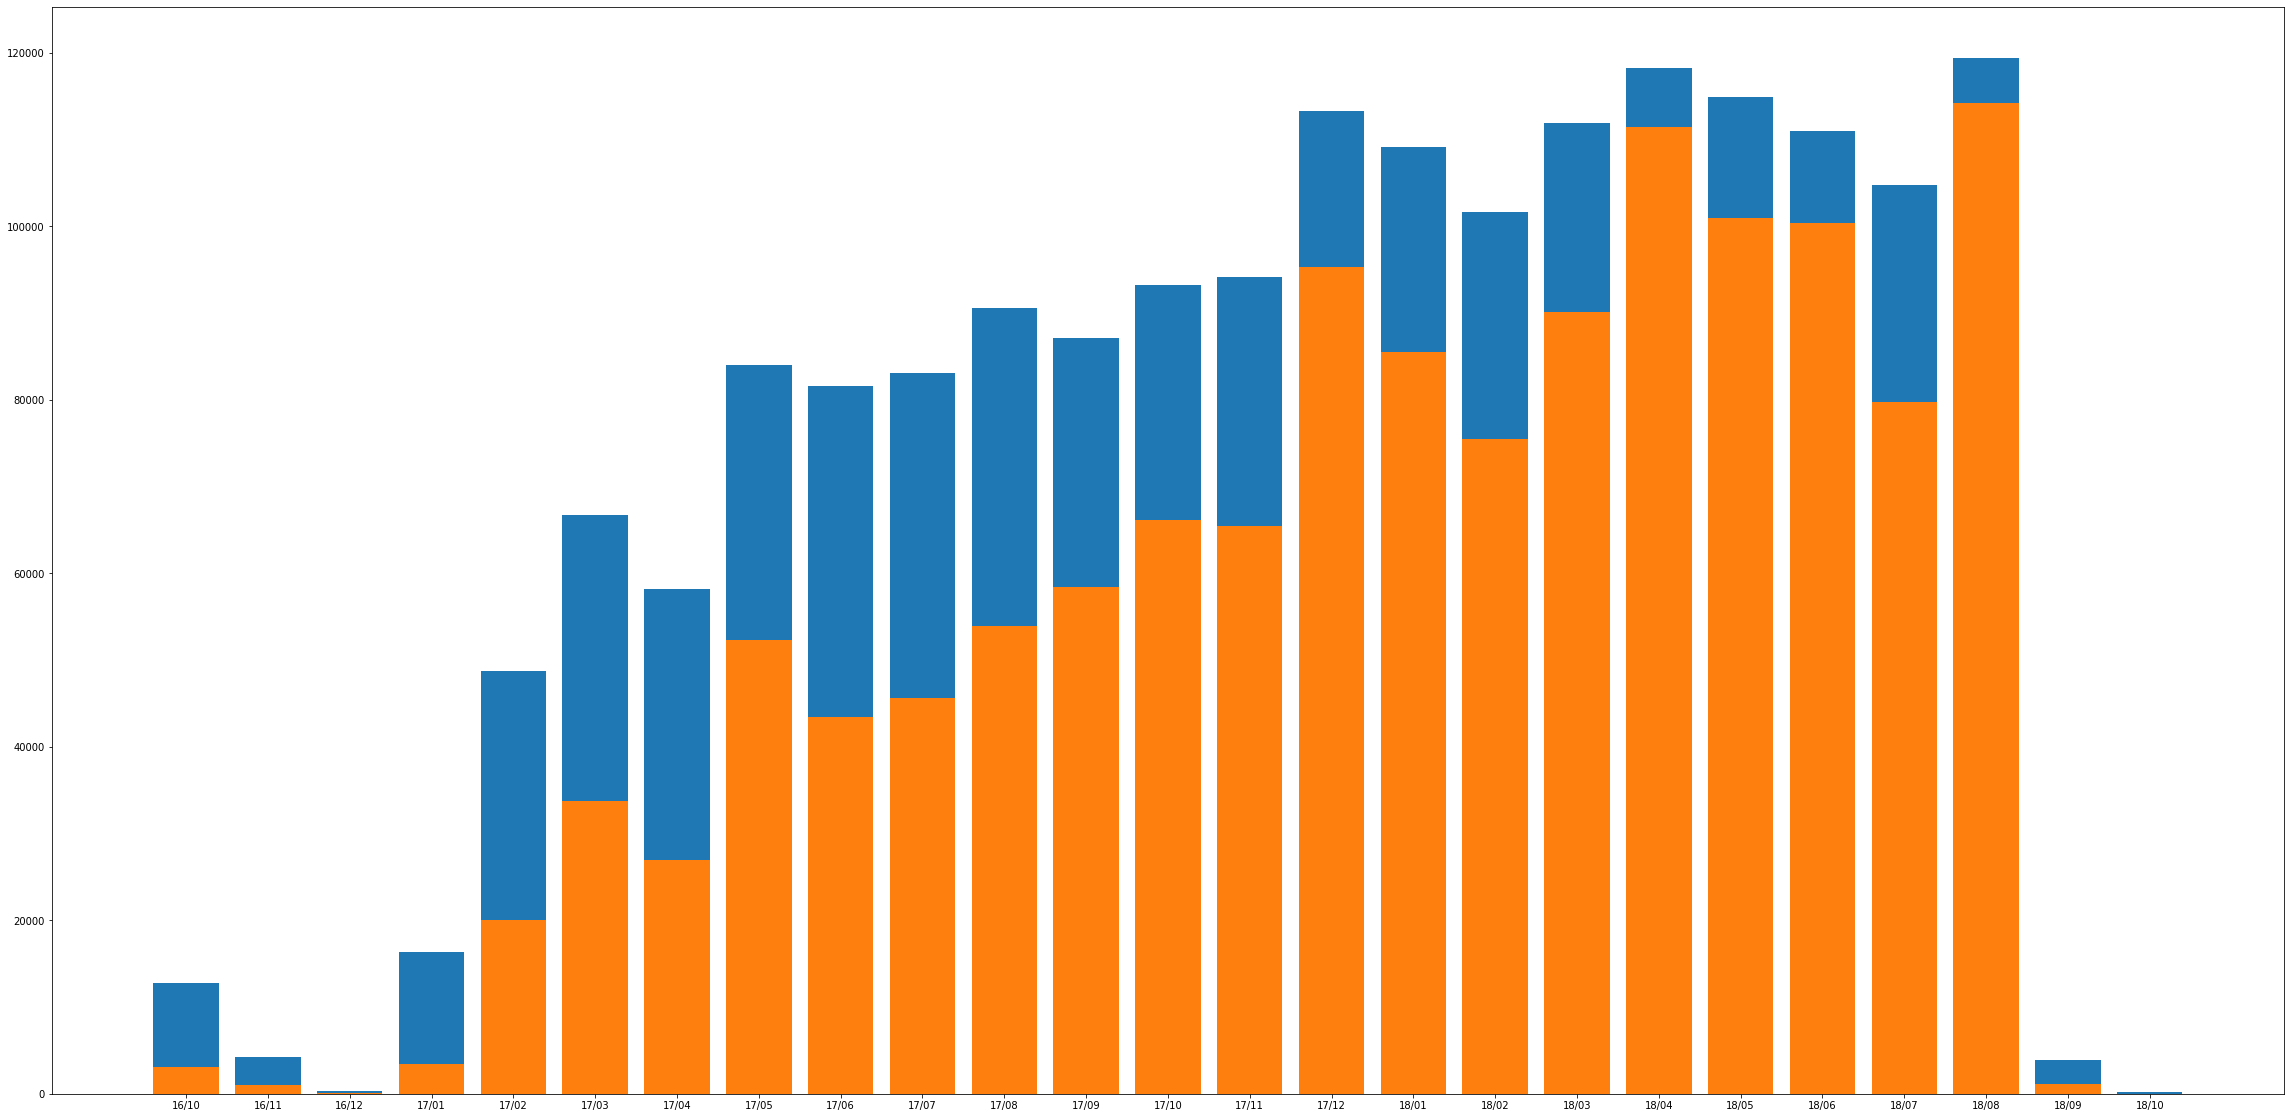

In [27]:
plt.figure(figsize=(40,20))
plt.bar(monthly2.index,monthly2['seller_rev'])
plt.bar(monthly2.index,monthly2['order_rev'])

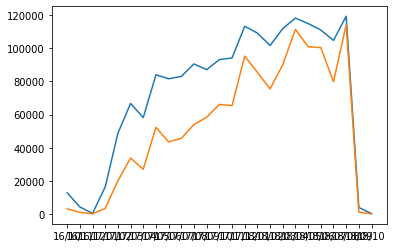

In [28]:
plt.plot(monthly2['seller_rev'])
plt.plot(monthly2['order_rev'])

<BarContainer object of 25 artists>

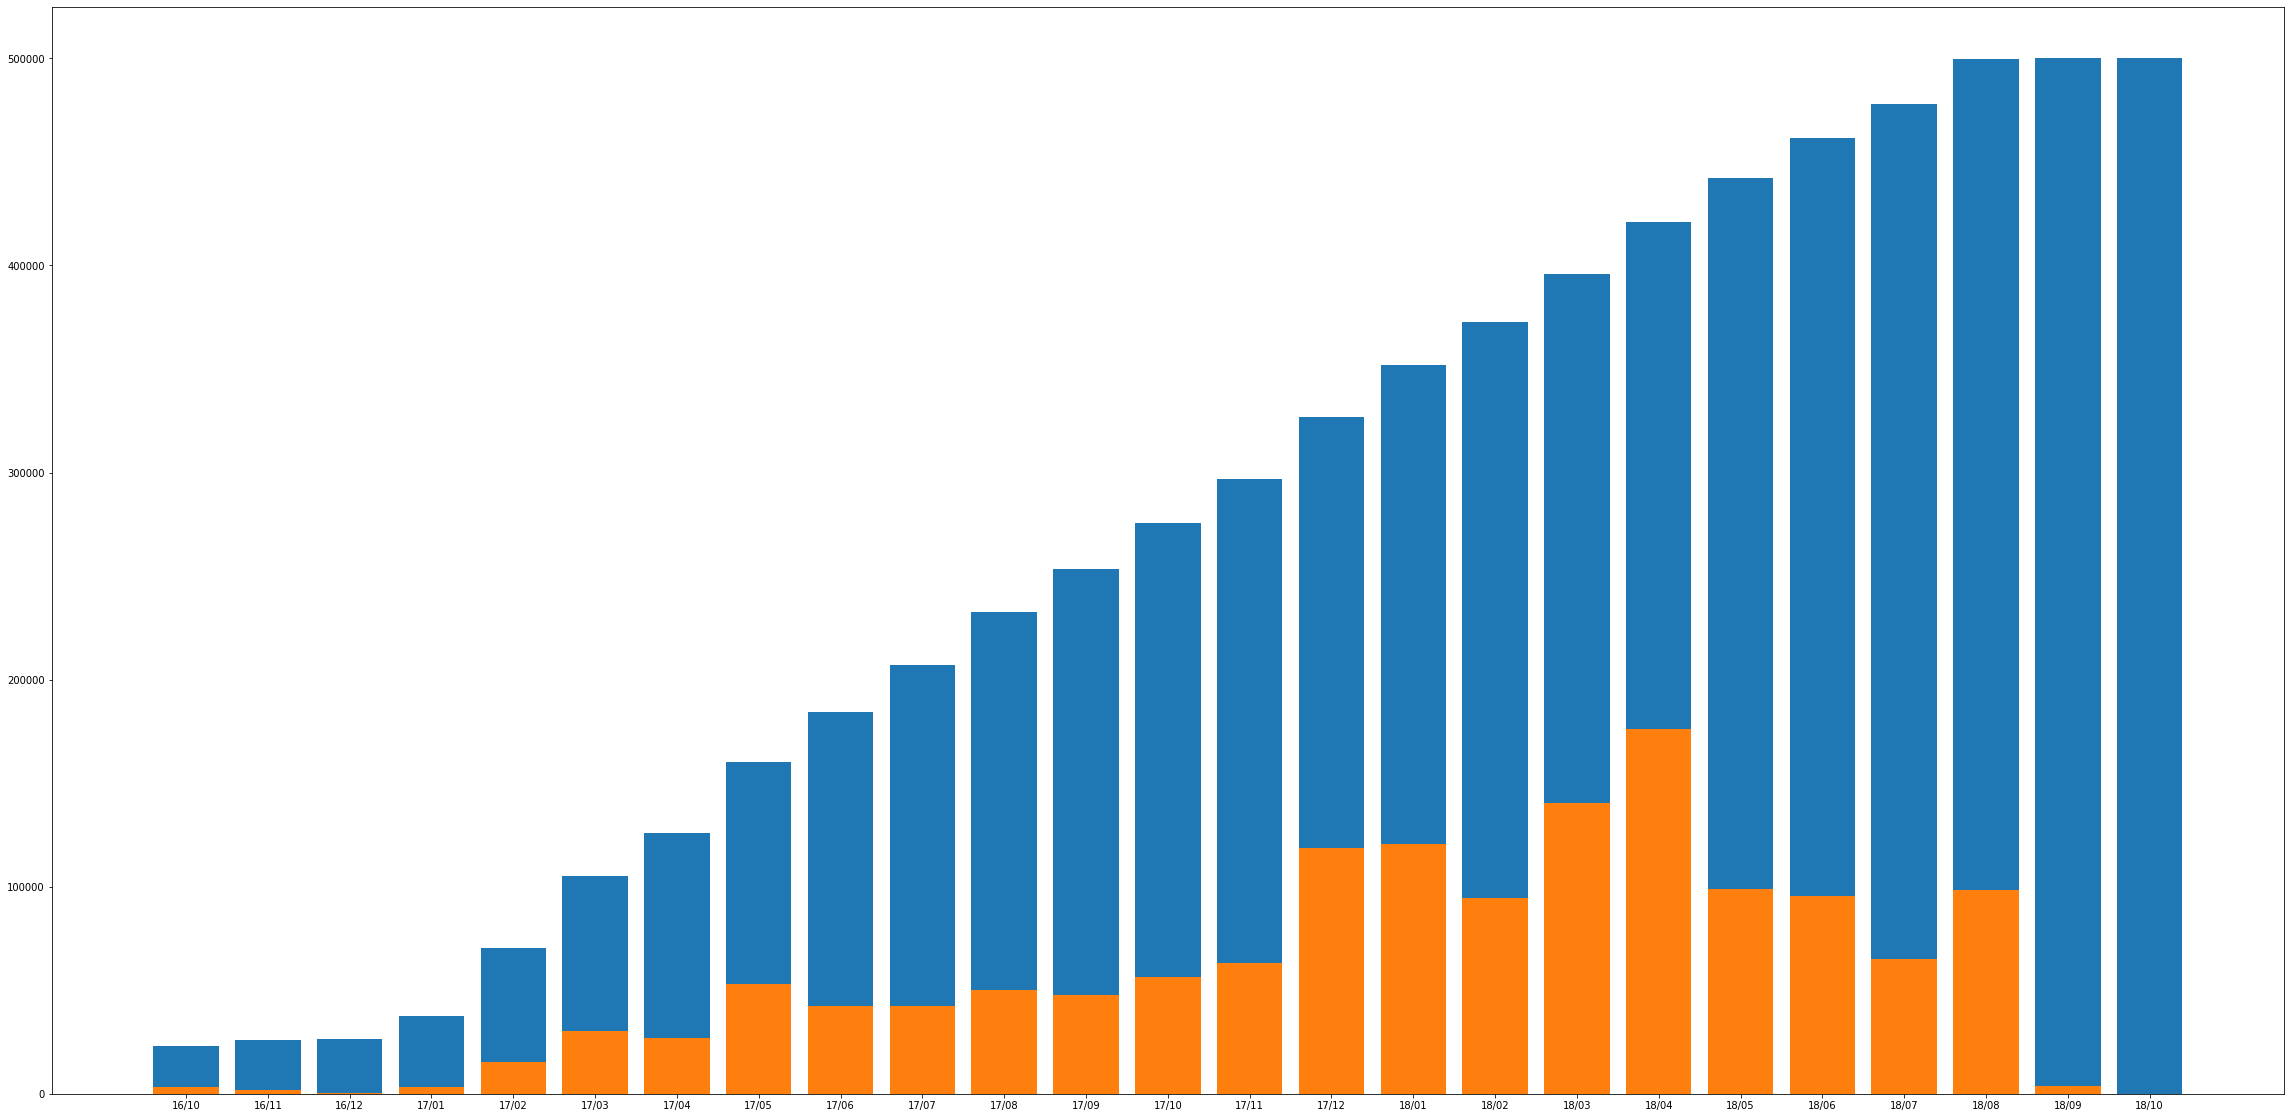

In [29]:
plt.figure(figsize=(40,20))
plt.bar(monthly2.index,monthly2['cum_it_cost'])
plt.bar(monthly2.index,monthly2['review_cost'])

In [22]:
monthly2 = monthly.copy()
monthly2 = monthly2.sort_values('order_delivered_customer_date')
monthly2['cum_orders'] = monthly2['orders'].cumsum()
monthly2['cum_rev'] = (monthly2['seller_rev'] + monthly2['order_rev']).cumsum()
c = 500000/np.sqrt(monthly2['orders'].sum())
monthly2['it_cost'] = round(c * np.sqrt(monthly2['orders']),1)
monthly2['cum_it_cost'] = round(c * np.sqrt(monthly2["cum_orders"]),1)
monthly2['cum_review_cost'] = monthly2['review_cost'].cumsum()
monthly2['total_cost'] = monthly2['cum_review_cost'] + monthly2['cum_it_cost']
monthly2['profit'] = monthly2['cum_rev'] - monthly2['total_cost']
monthly2['month'] = monthly2['order_rev'] + monthly2['seller_rev'] - monthly2['it_cost'] - monthly2['review_cost']


#sorted_profit['cum_profit'] = round(sorted_profit['cum_rev'] - sorted_profit['cum_it_cost'],1)

In [30]:
monthly2['month']

order_delivered_customer_date
16/10   -10598.788
16/11    -8726.132
16/12    -3023.714
17/01   -10759.508
17/02    -5749.708
17/03    -8417.600
17/04   -11009.396
17/05   -15526.362
17/06    -8690.405
17/07    -8120.803
17/08   -11100.075
17/09    -3712.376
17/10    -4875.159
17/11   -13662.651
17/12   -46898.390
18/01   -56540.492
18/02   -40463.215
18/03   -71323.400
18/04   -89066.609
18/05   -18846.742
18/06   -16931.913
18/07    -3328.361
18/08   -11594.346
18/09   -10819.796
18/10    -2520.760
Name: month, dtype: float64

In [31]:
data = Olist().get_data()
order_id_seller_id = data['order_items'][['order_id','seller_id']]

In [32]:
Olist().get_data()['order_items'][['order_id','seller_id']]

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [33]:
#reconfigure seller
seller['date_first_sale'] = pd.to_datetime(seller['date_first_sale'].map(lambda x: x.strftime("%Y-%m-%d")))
seller['date_last_sale'] = pd.to_datetime(seller['date_last_sale'])
seller['date_last_sale']=seller['date_last_sale'].map(lambda x: x.strftime("%Y-%m-%d"))
seller['date_last_sale'] = pd.to_datetime(seller['date_last_sale'])
seller['active_months'] = round((seller['date_last_sale']-seller['date_first_sale'])/datetime.timedelta(days=1)/30,0)

In [34]:
#add monthly fee if only # day active
seller['active_months'] = seller['active_months'].apply(lambda x: 1 if x == 0 else x)
# 80 BRL per month per seller
seller['rev_seller_monthly'] = seller['active_months']*80
# 10% of sales
seller['rev_orders_monthly'] = seller['sales']*0.1

In [35]:
# Merge orders with sellers
order_sel = order.merge(order_id_seller_id, on='order_id')

In [36]:
order_sel

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,order_delivered_customer_date,order_purchase_timestamp,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,review_cost,price_cut,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,2017-10-10 21:25:13,2017-10-02 10:56:33,0,0,4,1,1,29.99,8.72,0,2.999,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,2018-08-07 15:27:45,2018-07-24 20:41:37,0,0,4,1,1,118.70,22.76,0,11.870,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,2018-08-17 18:06:29,2018-08-08 08:38:49,1,0,5,1,1,159.90,19.22,0,15.990,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,2017-12-02 00:28:42,2017-11-18 19:28:06,1,0,5,1,1,45.00,27.20,0,4.500,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,2018-02-16 18:17:02,2018-02-13 21:18:39,1,0,5,1,1,19.90,8.72,0,1.990,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,2018-02-28 17:37:56,2018-02-06 12:58:58,0,0,4,1,1,174.90,20.10,0,17.490,1f9ab4708f3056ede07124aad39a2554
110836,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,2017-09-21 11:24:17,2017-08-27 14:46:43,1,0,5,1,1,205.99,65.02,0,20.599,d50d79cb34e38265a8649c383dcffd48
110837,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18,50,35.998,a1043bafd471dff536d0c462352beb48
110838,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18,50,35.998,a1043bafd471dff536d0c462352beb48


In [37]:
#Define two/three star functions and applying
def dim_two_star(d):
            if d == 2:
                return 1
            else:
                return 0
            
def dim_three_star(d):
            if d == 3:
                return 1
            else:
                return 0

order_sel['dim_is_two_star'] = order_sel['review_score'].apply(dim_two_star)
order_sel['dim_is_three_star'] = order_sel['review_score'].apply(dim_three_star)

In [38]:
#Summing binary columns, aggregating and getting reduced dataset
seller_id_star = order_sel.groupby('seller_id').agg('sum')
seller_small = seller_id_star[['dim_is_one_star','dim_is_two_star','dim_is_three_star']]
seller_small

,dim_is_one_star,dim_is_two_star,dim_is_three_star
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,0,0
001cca7ae9ae17fb1caed9dfb1094831,31,11,21
002100f778ceb8431b7a1020ff7ab48f,6,1,9
003554e2dce176b5555353e4f3555ac8,0,0,0
004c9cd9d87a3c30c522c48c4fc07416,15,10,20
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,2,0,5
ffdd9f82b9a447f6f8d4b91554cc7dd3,1,2,1
ffeee66ac5d5a62fe688b9d26f83f534,2,0,0


In [39]:
order_sel.groupby('seller_id').agg('sum')[['dim_is_one_star','dim_is_two_star','dim_is_three_star']]

,dim_is_one_star,dim_is_two_star,dim_is_three_star
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,0,0
001cca7ae9ae17fb1caed9dfb1094831,31,11,21
002100f778ceb8431b7a1020ff7ab48f,6,1,9
003554e2dce176b5555353e4f3555ac8,0,0,0
004c9cd9d87a3c30c522c48c4fc07416,15,10,20
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,2,0,5
ffdd9f82b9a447f6f8d4b91554cc7dd3,1,2,1
ffeee66ac5d5a62fe688b9d26f83f534,2,0,0


In [40]:
# Calculating full review cost
seller_small['dim_is_one_star'] = seller_small['dim_is_one_star']*100
seller_small['dim_is_two_star'] = seller_small['dim_is_two_star']*50
seller_small['dim_is_three_star'] = seller_small['dim_is_three_star']*40
seller_small['sum'] = seller_small.sum(axis=1)
seller_cost = seller_small[['sum']].rename(columns={'sum':'cost_reviews'})
#seller_cost = seller_cost.rename(columns={'sum':'cost_reviews'})

/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

In [47]:
seller_cost

,cost_reviews
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,100
001cca7ae9ae17fb1caed9dfb1094831,4490
002100f778ceb8431b7a1020ff7ab48f,1010
003554e2dce176b5555353e4f3555ac8,0
004c9cd9d87a3c30c522c48c4fc07416,2800
...,...
ffc470761de7d0232558ba5e786e57b7,400
ffdd9f82b9a447f6f8d4b91554cc7dd3,240
ffeee66ac5d5a62fe688b9d26f83f534,200


In [48]:
# Merge
seller_table = seller[['seller_id','rev_seller_monthly','rev_orders_monthly','active_months','wait_time','delay_to_carrier','review_score','n_orders']]
seller_rc = seller_table.merge(seller_cost, on = 'seller_id')

In [49]:
# Revenue, cost, profit per seller_id
seller_rc['total_rev'] = seller_rc['rev_seller_monthly']+seller_rc['rev_orders_monthly']
seller_rc['profit'] = seller_rc['total_rev'] - seller_rc['cost_reviews']
seller_rc = seller_rc.round(2)
seller_rc = seller_rc.rename(columns={'rev_seller_monthly':'rev_seller','rev_orders_monthly' : 'rev_orders', 'cost reviews':'cost_reviews'})
seller_rc['profitable'] = seller_rc['profit'].apply(lambda x: 0 if x < 0 else 1)
seller_rc.head()

,seller_id,rev_seller,rev_orders,active_months,wait_time,delay_to_carrier,review_score,n_orders,cost_reviews,total_rev,profit,profitable
0,3442f8959a84dea7ee197c632cb2df15,320.0,21.87,4.0,13.02,0.00,3.00,3,140,341.87,201.87,1
1,d1b65fc7debc3361ea86b5f14c68d2e2,1120.0,1170.31,14.0,9.07,0.00,4.55,40,140,2290.31,2150.31,1
2,ce3ad9de960102d0677a81f5d0bb7b2d,80.0,15.80,1.0,4.04,0.00,5.00,1,0,95.80,95.80,1
3,c0f3eea2e14555b6faeea3dd58c1b1c3,80.0,8.00,1.0,5.67,0.00,5.00,1,0,88.00,88.00,1
4,51a04a8a6bdcb23deccc82b0b80742cf,80.0,16.80,1.0,35.31,3.35,1.00,1,100,96.80,-3.20,0


In [50]:
seller_it = seller_rc[['seller_id','profit','n_orders']]
# Sort cumulative
sorted_profit = seller_it.sort_values('profit').reset_index()
sorted_profit['cum_orders'] = sorted_profit['n_orders'].cumsum()
sorted_profit['cum_rev'] = round(sorted_profit['profit'].cumsum(),1)
c = 500000/np.sqrt(sorted_profit['n_orders'].sum())
sorted_profit['it_cost'] = round(c * np.sqrt(sorted_profit["n_orders"]),1)
sorted_profit['cum_it_cost'] = round(c * np.sqrt(sorted_profit["cum_orders"]),1)
sorted_profit['cum_profit'] = round(sorted_profit['cum_rev'] - sorted_profit['cum_it_cost'],1)

In [55]:
sorted_profit

,index,seller_id,profit,n_orders,cum_orders,cum_rev,it_cost,cum_it_cost,cum_profit
0,453,1f50f920176fa81dab994f9023523100,-25486.08,1404,1404,-25486.1,59291.5,59291.5,-84777.6
1,769,6560211a19b47992c3666cc44a7e94c0,-24679.52,1854,3258,-50165.6,68134.0,90320.1,-140485.7
2,1133,7c67e1448b00f6e969d365cea6b010ab,-23847.61,982,4240,-74013.2,49586.6,103036.7,-177049.9
3,2360,4a3ca9315b744ce9f8e9374361493884,-22612.71,1806,6046,-96625.9,67246.2,123039.1,-219665.0
4,946,ea8482cd71df3c1969d7b9473ff13abc,-17172.25,1146,7192,-113798.2,53567.5,134194.2,-247992.4
...,...,...,...,...,...,...,...,...,...
2965,2153,edb1ef5e36e0c8cd84eb3c9b003e486d,7338.46,166,98044,933409.4,20387.5,495472.5,437936.9
2966,2833,46dc3b2cc0980fb8ec44634e21d2718e,7571.12,521,98565,940980.6,36118.3,496787.2,444193.4
2967,534,fa1c13f2614d7b5c4749cbc52fecda94,14804.20,585,99150,955784.8,38272.5,498259.3,457525.5
2968,67,7e93a43ef30c4f03f38b393420bc753a,15963.19,336,99486,971747.9,29005.4,499102.8,472645.1


<BarContainer object of 2970 artists>

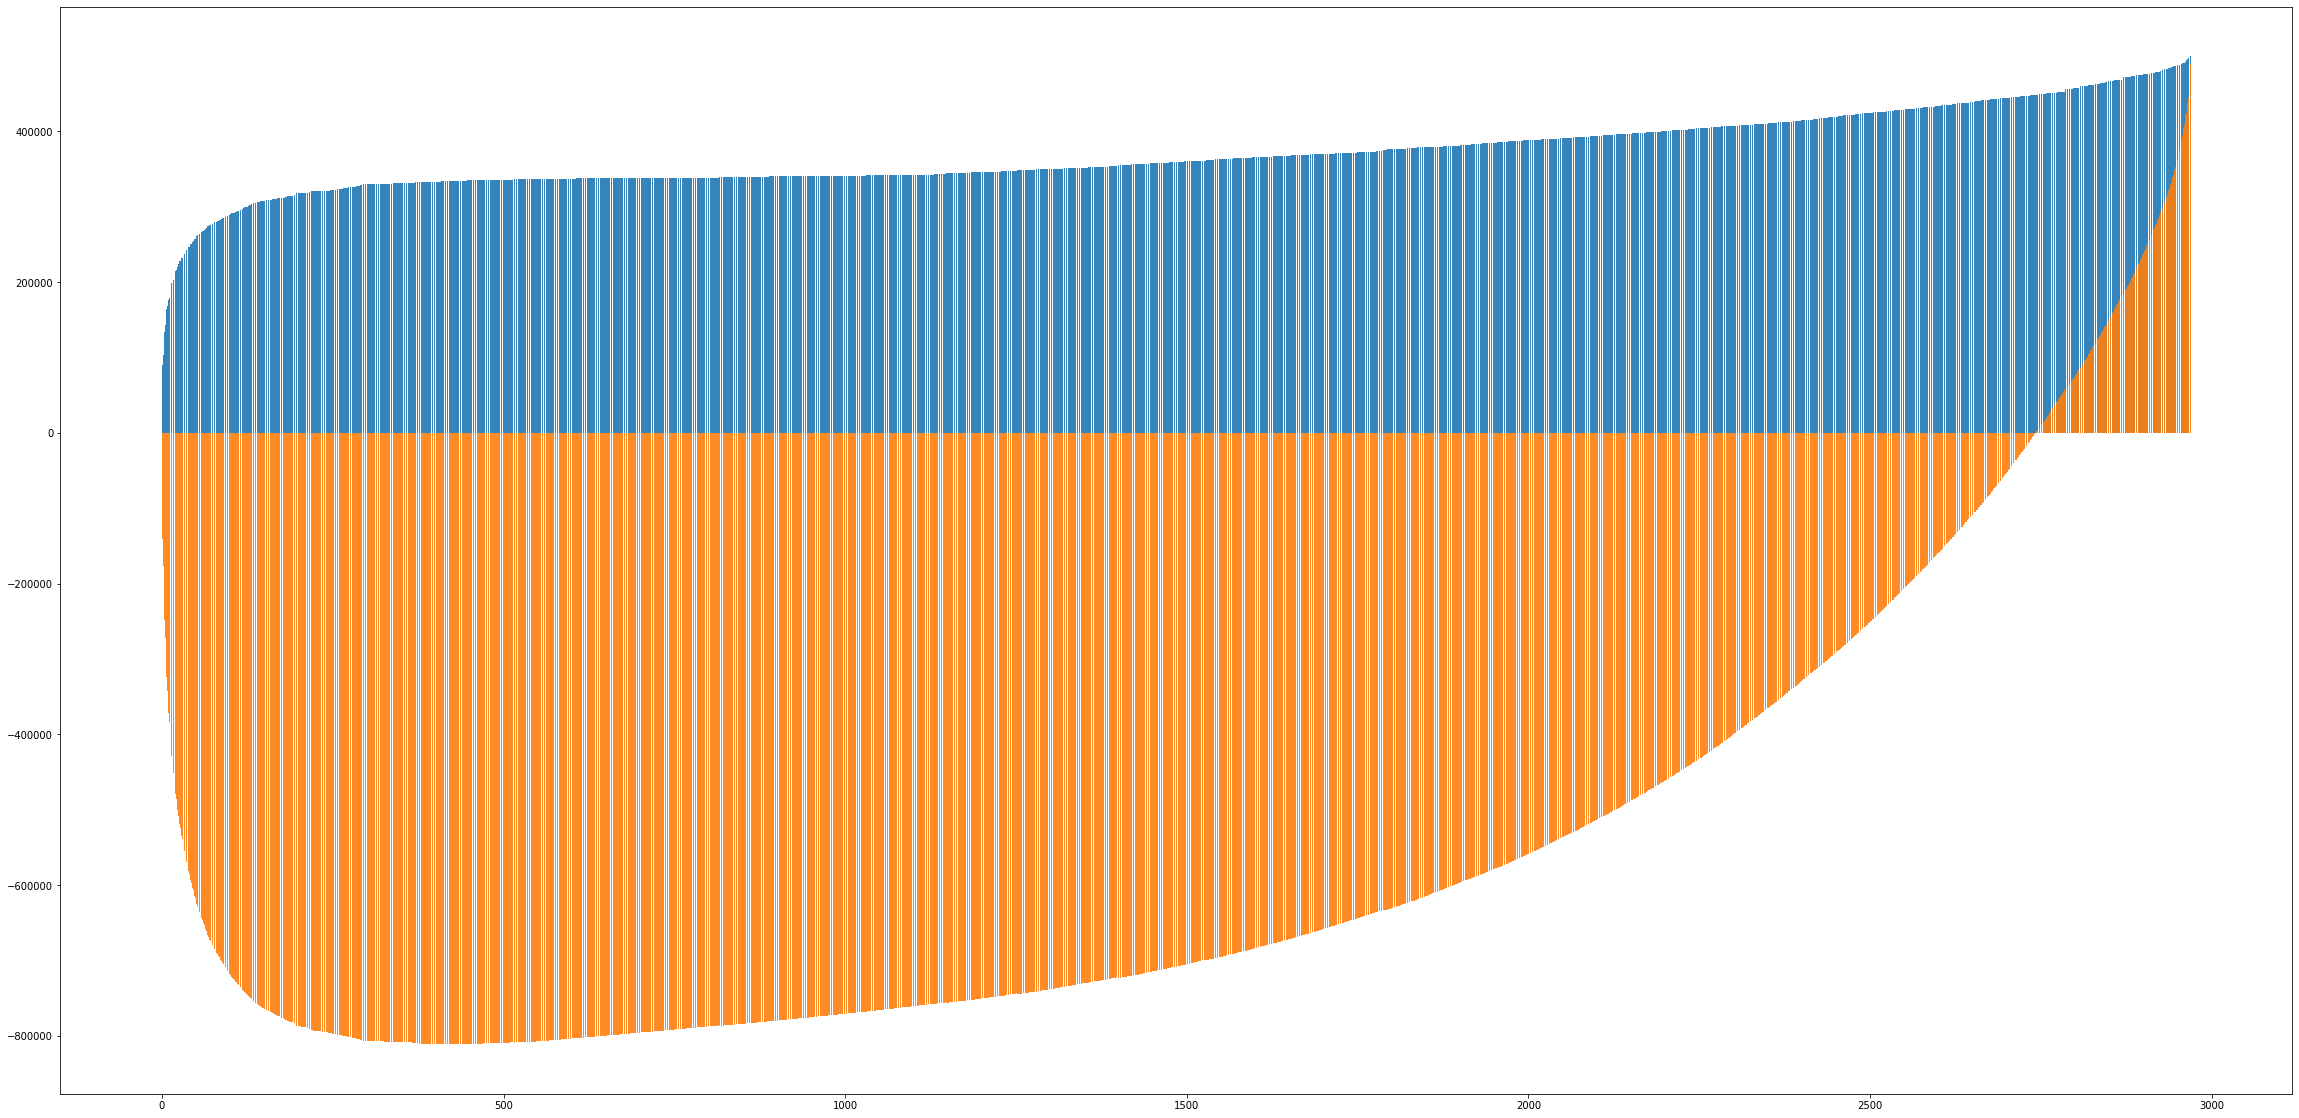

In [62]:
plt.figure(figsize=(40,20))
plt.bar(x=sorted_profit.index, height = sorted_profit['cum_it_cost'], alpha = 0.9)
plt.bar(x=sorted_profit.index, height = sorted_profit['cum_profit'], alpha = 0.9)

<AxesSubplot:ylabel='cum_profit'>

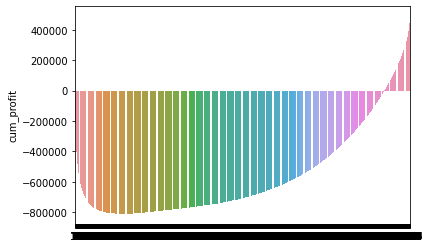

In [63]:
###Plot cumulative costs and revenues
it_prof = sorted_profit[['cum_profit']]
sns.barplot(data=it_prof, x=it_prof.index, y='cum_profit')

In [64]:
# Optimalisation loop
optim_profit = sorted_profit.copy()
ls = []
i = 0
while i < len(sorted_profit):
    # get necessary results in new list
    ls.append([optim_profit['seller_id'].iloc[0],optim_profit['cum_profit'].iloc[-1]])
    # drop top row
    optim_profit = optim_profit.drop(optim_profit.index[0])
    i += 1
    # recalculate DF
    optim_profit['cum_orders'] = optim_profit['n_orders'].cumsum()
    optim_profit['cum_rev'] = round(optim_profit['profit'].cumsum(),1)
    optim_profit['it_cost'] = round(c * np.sqrt(optim_profit["n_orders"]),1)
    c = 500000/np.sqrt(optim_profit['n_orders'].sum())
    optim_profit['cum_it_cost'] = round(c * np.sqrt(optim_profit["cum_orders"]),1)
    optim_profit['prof/it'] = optim_profit['profit']/optim_profit['it_cost']
    optim_profit['cum_profit'] = round(optim_profit['cum_rev'] - optim_profit['cum_it_cost'],1)

/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [65]:
# New DF for optimal
optim = pd.DataFrame(ls).rename(columns={0:'seller_id',1:'profit'})
optim.reset_index(inplace=True)
optim.rename(columns={'index':'companies to cut'},inplace=True)

In [79]:
# Cut-off value & optimal profit
optim[optim['profit']==optim['profit'].max()].index[0]

374

In [80]:
optim['profit'].max()].index[0]

SyntaxError: invalid syntax (<ipython-input-80-819e69a258e8>, line 1)

In [77]:
optim

,companies to cut,seller_id,profit
0,0,1f50f920176fa81dab994f9023523100,489535.5
1,1,6560211a19b47992c3666cc44a7e94c0,515021.6
2,2,7c67e1448b00f6e969d365cea6b010ab,539701.1
3,3,4a3ca9315b744ce9f8e9374361493884,563548.8
4,4,ea8482cd71df3c1969d7b9473ff13abc,586161.5
...,...,...,...
2965,2965,edb1ef5e36e0c8cd84eb3c9b003e486d,-436535.4
2966,2966,46dc3b2cc0980fb8ec44634e21d2718e,-443873.9
2967,2967,fa1c13f2614d7b5c4749cbc52fecda94,-451445.0
2968,2968,7e93a43ef30c4f03f38b393420bc753a,-466249.2


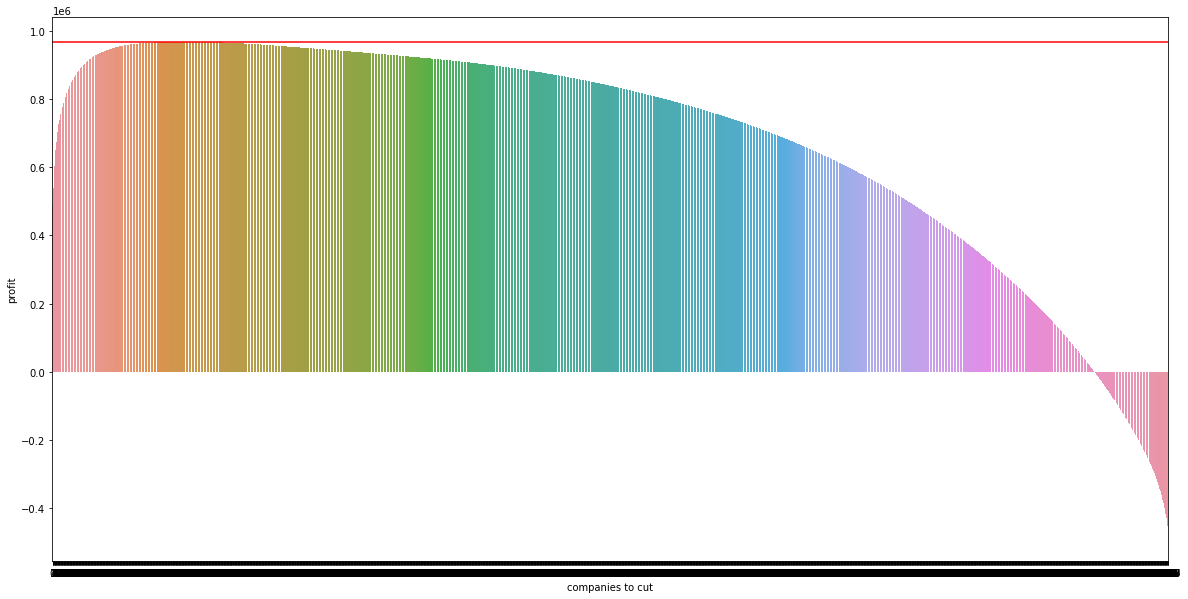

In [69]:
# graphical representation
plt.figure(figsize=(20,10))
sns.barplot(y='profit',x='companies to cut',data=optim)
plt.axhline(y=optim['profit'].max(), color='r', linestyle='-')

In [81]:
to_cut = pd.DataFrame(optim[optim.index < optim[optim['profit']==optim['profit'].max()].index[0]]['seller_id'])
to_cut['cut'] = "cut"

In [87]:
to_cut

,seller_id,cut
0,1f50f920176fa81dab994f9023523100,cut
1,6560211a19b47992c3666cc44a7e94c0,cut
2,7c67e1448b00f6e969d365cea6b010ab,cut
3,4a3ca9315b744ce9f8e9374361493884,cut
4,ea8482cd71df3c1969d7b9473ff13abc,cut
...,...,...
369,e1dc0754bada9ee4cfe9713f22f61292,cut
370,3a79f35a2344ede41af21267f61d5ec6,cut
371,2e1c9f22be269ef4643f826c9e650a52,cut
372,f356c348fbc8df6a882823e21f5ce8b7,cut


In [82]:
sorted_profit_cut = sorted_profit.merge(to_cut, on = 'seller_id', how = 'left')

In [83]:
# new df
new_df = sorted_profit[sorted_profit_cut['cut'] != 'cut']

In [95]:
new_df[,1]

SyntaxError: invalid syntax (<ipython-input-95-349235beae8e>, line 1)

In [85]:
new_df = new_df.sort_values('profit')
new_df['cum_orders'] = new_df['n_orders'].cumsum()
new_df['cum_rev'] = round(new_df['profit'].cumsum(),1)
c = 500000/np.sqrt(new_df['n_orders'].sum())
new_df['it_cost'] = round(c * np.sqrt(new_df["n_orders"]),1)
new_df['cum_it_cost'] = round(c * np.sqrt(new_df["cum_orders"]),1)
new_df['cum_profit'] = round(new_df['cum_rev'] - new_df['cum_it_cost'],1)

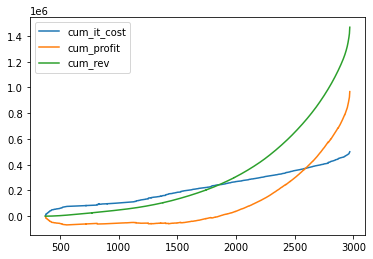

In [75]:
it_prof_new = new_df[['cum_it_cost','cum_profit','cum_rev']]
plt.plot(it_prof_new)
plt.legend(['cum_it_cost','cum_profit','cum_rev'])

In [86]:
new_df

,index,seller_id,profit,n_orders,cum_orders,cum_rev,it_cost,cum_it_cost,cum_profit
374,2954,4e2627090e6e5b9fabba883a37897683,-0.05,2,2,-0.0,2996.1,2996.1,-2996.1
375,2709,1588ac4010787100dddef64568f0ae35,-0.00,3,5,-0.0,3669.5,4737.3,-4737.3
376,1167,19484c79cef6c062cb177aa4ef2fcc3c,0.19,1,6,0.1,2118.6,5189.5,-5189.4
377,1844,01fd077212124329bac32490e8ef80d9,0.80,31,37,0.9,11795.8,12886.9,-12886.0
378,1487,f593898ec748b7a8cb81fc04edafd98a,1.30,20,57,2.2,9474.6,15995.0,-15992.8
...,...,...,...,...,...,...,...,...,...
2965,2153,edb1ef5e36e0c8cd84eb3c9b003e486d,7338.46,166,53899,1411223.0,27296.1,491854.5,919368.5
2966,2833,46dc3b2cc0980fb8ec44634e21d2718e,7571.12,521,54420,1418794.1,48357.6,494226.0,924568.1
2967,534,fa1c13f2614d7b5c4749cbc52fecda94,14804.20,585,55005,1433598.3,51241.8,496875.3,936723.0
2968,67,7e93a43ef30c4f03f38b393420bc753a,15963.19,336,55341,1449561.5,38834.3,498390.6,951170.9


In [99]:
optim = False

In [101]:
optim == False

True